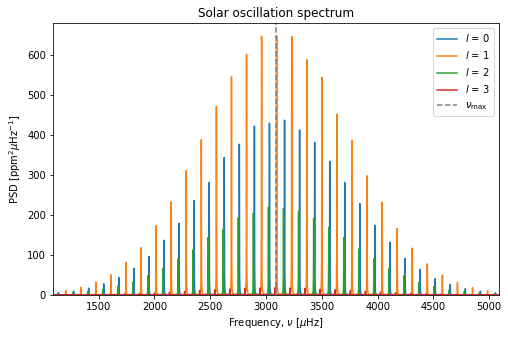

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Feb 3 15:13:26 2022

@author: Raoul
"""

import numpy as np
import matplotlib.pyplot as plt
#import matplotlib as mpl
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.size'] = 11

def nu(delta_nu, n, l):
    nu = []
    for l in l:
        nu.append(delta_nu * (n + l/2 + 1.45) - D * l * (l + 1))
    return nu

def lorentzian(x, x_0, width):
    return 1 / (np.pi * width * (1 + ((x - x_0) / width)**2))

def gaussian(x, sigma, mu):
    return np.exp(-(x - mu)**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))

# Define solar parameters
L_sun = 3.846e26 # W
M_sun = 1.989e30 # kg
R_sun = 6.957e8 # m

# Define stellar parameters
L = L_sun
M = M_sun
R = R_sun

# Define temperatures
T_0 = 436 # K
T_eff = 5777 # K
T_red = 8907 * (L / L_sun)**(-0.093) # K

n = np.arange(40) # Array of n values to be plotted
l = np.arange(4) # Array of l values to be plotted
D = 1.5 # μHz
gamma_0 = 1.02 # μHz
delta_nu = M**(1/2) * R**(-3/2) * 135 / (M_sun**(1/2) * R_sun**(-3/2)) # μHz
nu = nu(delta_nu, n, l) # μHz
gamma = gamma_0 * np.exp((T_eff - 5777) / T_0) # μHz
amplitude = 2.1 * (1 - np.exp((T_eff - T_red) / 1250)) # ppm
visibility = np.array([1, 1.5, 0.5, 0.04])

nu_max = 3090 # μHz
sigma = nu_max / 2 / np.sqrt(8 * np.log(2))
x = np.linspace(nu_max-2000, nu_max+2000, 10000) # μHz

plt.figure(figsize=(8, 5))

for l in l:
    y = np.zeros_like(x)
    for n in nu[l]:
        y += gaussian(x, sigma, nu_max) * amplitude**2 * 2 / np.pi / gamma * visibility[l] * 1e6 * lorentzian(x, n, gamma)
    plt.plot(x, y, label=r'$l$ = {}'.format(l))

plt.axvline(x=nu_max, ls='--', color='gray', label=r'$\nu_{\rm max}$')
plt.title('Solar oscillation spectrum')
plt.xlabel(r'Frequency, $\nu$ [$\mu$Hz]')
plt.ylabel(r'PSD [ppm$^2 \mu$Hz$^{-1}$]')
plt.xlim(np.min(x), np.max(x))
plt.ylim(0)
plt.legend()
plt.savefig('oscillation_spectrum.pdf')

In [2]:
print(len(x))
print(len(y))

10000
10000


In [3]:
f = open("data.txt", "w+")
f.write('Frequency[microHertz], PSD [ppm^2 per microHertz]' + "\n")

i = 0
while i<10000:
    f.write(str(x[i])+','+str(y[i]) + "\n")
    i+=1
    
f.close()